In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 3000)
#SK LEARN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from pickle import dump

In [54]:
df4 = pd.read_excel('Life Expectancy Data2.xlsm', index_col=0)
df4.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0
1,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9
2,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8
3,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5
4,Afghanistan,2010,Developing,58.8,279,74,0.01,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,18.4,18.4,0.448,9.2


In [18]:
corr=df4.corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.161383,-0.077150,-0.034036,0.027952,0.113362,-0.081769,0.091546,-0.038953,0.104327,0.086799,0.140821,-0.127858,-0.042292,-0.046216,0.235930,0.207358
Life expectancy,0.161383,1.000000,-0.692944,-0.194423,0.408207,0.244835,-0.159847,0.569615,-0.220328,0.463649,0.218298,0.477985,-0.560502,-0.477270,-0.471421,0.716402,0.747590
Adult Mortality,-0.077150,-0.692944,1.000000,0.074511,-0.189848,-0.158200,0.029980,-0.388090,0.089803,-0.270066,-0.115577,-0.272591,0.526703,0.303022,0.308641,-0.449969,-0.450234
infant deaths,-0.034036,-0.194423,0.074511,1.000000,-0.125649,-0.233199,0.491603,-0.228064,0.996752,-0.173606,-0.128931,-0.178031,0.023499,0.463546,0.469442,-0.142252,-0.194328
Alcohol,0.027952,0.408207,-0.189848,-0.125649,1.000000,0.093544,-0.062432,0.334068,-0.121930,0.236342,0.314074,0.235493,-0.056378,-0.442329,-0.429141,0.458538,0.561142
Hepatitis B,0.113362,0.244835,-0.158200,-0.233199,0.093544,1.000000,-0.129665,0.152670,-0.242046,0.475890,0.071265,0.586475,-0.109589,-0.126998,-0.128935,0.190924,0.214011
Measles,-0.081769,-0.159847,0.029980,0.491603,-0.062432,-0.129665,1.000000,-0.178110,0.500005,-0.141937,-0.106382,-0.147856,0.030385,0.219843,0.216158,-0.130506,-0.140589
BMI,0.091546,0.569615,-0.388090,-0.228064,0.334068,0.152670,-0.178110,1.000000,-0.238565,0.293020,0.239196,0.290806,-0.245195,-0.534662,-0.541056,0.504830,0.556628
under-five deaths,-0.038953,-0.220328,0.089803,0.996752,-0.121930,-0.242046,0.500005,-0.238565,1.000000,-0.191813,-0.130456,-0.198577,0.036140,0.466448,0.471166,-0.160306,-0.209955
Polio,0.104327,0.463649,-0.270066,-0.173606,0.236342,0.475890,-0.141937,0.293020,-0.191813,1.000000,0.145587,0.673099,-0.158606,-0.224576,-0.225270,0.378763,0.418219


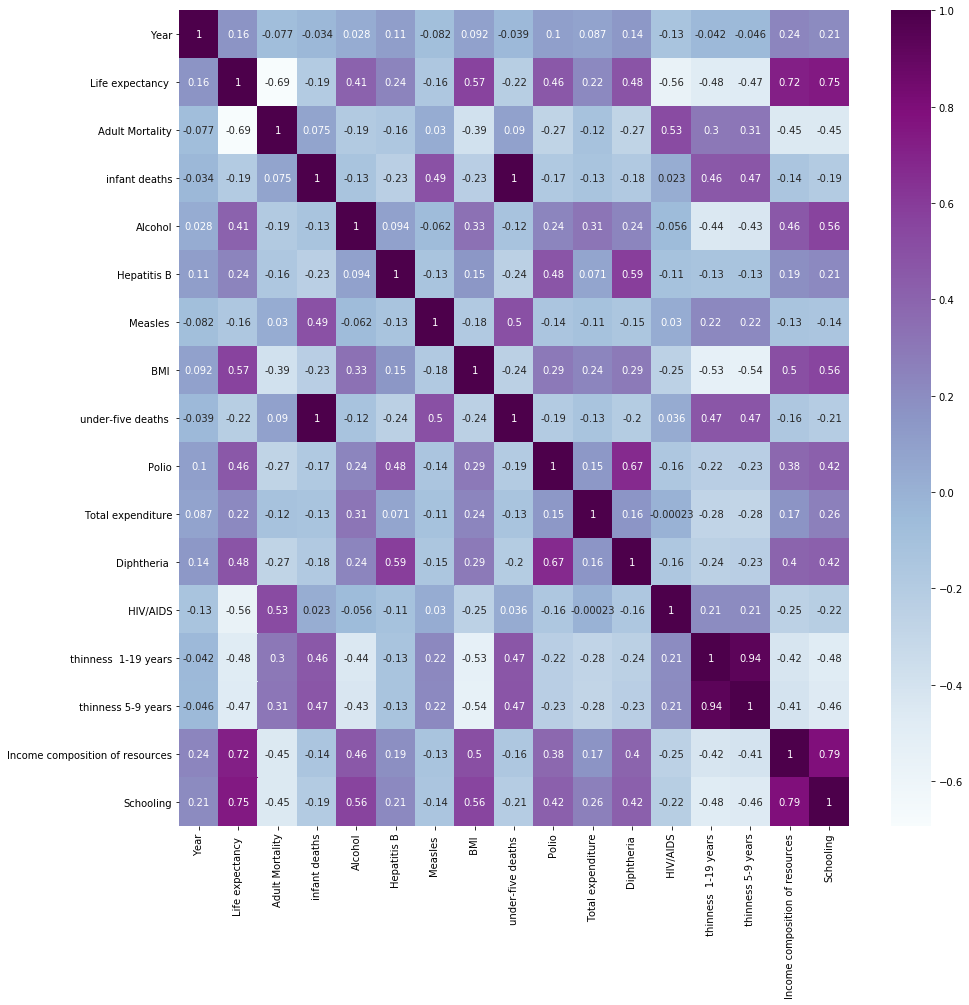

In [19]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap="BuPu",annot=True)

In [22]:
df4.drop(columns=[' thinness  1-19 years', 'under-five deaths '], inplace=True)
# dropped 2 columns due to high correlation

KeyError: "[' thinness  1-19 years' 'under-five deaths '] not found in axis"

In [26]:
df4

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2014,Developing,59.9,271,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,17.5,0.476,10.0
1,Afghanistan,2013,Developing,59.9,268,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,17.7,0.470,9.9
2,Afghanistan,2012,Developing,59.5,272,69,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,18.0,0.463,9.8
3,Afghanistan,2011,Developing,59.2,275,71,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,18.2,0.454,9.5
4,Afghanistan,2010,Developing,58.8,279,74,0.01,66.0,1989,16.7,66.0,9.20,66.0,0.1,18.4,0.448,9.2
5,Afghanistan,2009,Developing,58.6,281,77,0.01,63.0,2861,16.2,63.0,9.42,63.0,0.1,18.7,0.434,8.9
6,Afghanistan,2008,Developing,58.1,287,80,0.03,64.0,1599,15.7,64.0,8.33,64.0,0.1,18.9,0.433,8.7
7,Afghanistan,2007,Developing,57.5,295,82,0.02,63.0,1141,15.2,63.0,6.73,63.0,0.1,19.1,0.415,8.4
8,Afghanistan,2006,Developing,57.3,295,84,0.03,64.0,1990,14.7,58.0,7.43,58.0,0.1,19.3,0.405,8.1
9,Afghanistan,2005,Developing,57.3,291,85,0.02,66.0,1296,14.2,58.0,8.70,58.0,0.1,19.5,0.396,7.9


In [28]:
corr=df4.corr()
corr[abs(corr > 0.70)] #easier to pick out highly correlated

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling
Year,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Life expectancy,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.716402,0.747590
Adult Mortality,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
infant deaths,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcohol,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hepatitis B,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Measles,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Total expenditure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [29]:
df4['yr ago from 2014'] =  df4['Year'].map(lambda x: 2014-x)

In [53]:
df4.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling,yr ago from 2014
0,Afghanistan,Developing,59.9,271,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,17.5,0.476,10.0,0
1,Afghanistan,Developing,59.9,268,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,17.7,0.470,9.9,1
2,Afghanistan,Developing,59.5,272,69,0.01,67.0,1000,17.6,67.0,8.52,67.0,0.1,18.0,0.463,9.8,2
3,Afghanistan,Developing,59.2,275,71,0.01,68.0,1000,17.2,68.0,7.87,68.0,0.1,18.2,0.454,9.5,3
4,Afghanistan,Developing,58.8,279,74,0.01,66.0,1000,16.7,66.0,9.20,66.0,0.1,18.4,0.448,9.2,4


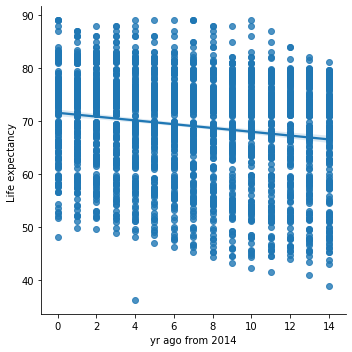

In [35]:
#visualizing 'Life expetancy' and 'yr ago from 2014'.... linear? 
sns.lmplot(x='yr ago from 2014',y='Life expectancy ',data=df4[df4['yr ago from 2014']<15],fit_reg=True)

In [36]:
df4.drop(columns='Year', inplace=True)

In [52]:
df4.head()

,Country,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 5-9 years,Income composition of resources,Schooling,yr ago from 2014
0,Afghanistan,Developing,59.9,271,64,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,17.5,0.476,10.0,0
1,Afghanistan,Developing,59.9,268,66,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,17.7,0.470,9.9,1
2,Afghanistan,Developing,59.5,272,69,0.01,67.0,1000,17.6,67.0,8.52,67.0,0.1,18.0,0.463,9.8,2
3,Afghanistan,Developing,59.2,275,71,0.01,68.0,1000,17.2,68.0,7.87,68.0,0.1,18.2,0.454,9.5,3
4,Afghanistan,Developing,58.8,279,74,0.01,66.0,1000,16.7,66.0,9.20,66.0,0.1,18.4,0.448,9.2,4


In [38]:
df4.columns

Index(['Country', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'yr ago from 2014'],
      dtype='object')

In [39]:
features = ['Adult Mortality',
       'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ', ' BMI ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'yr ago from 2014']

In [40]:
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]

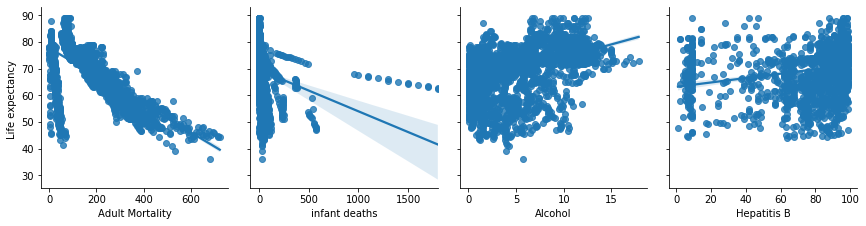

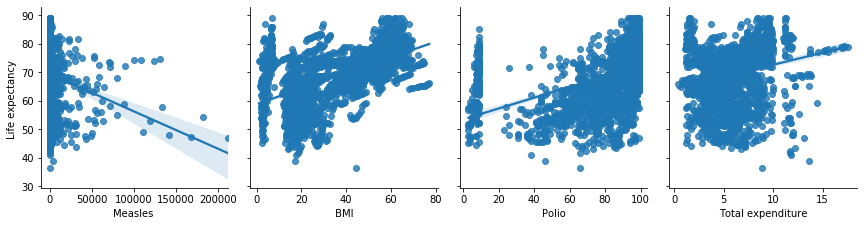

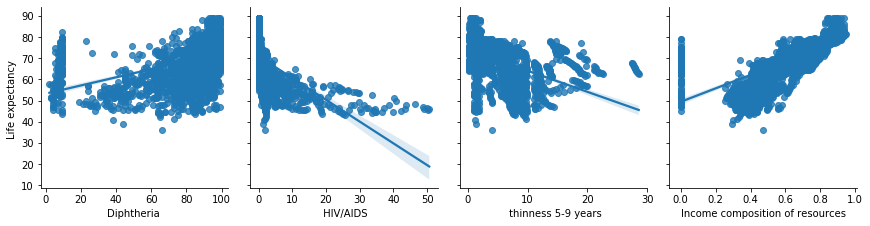

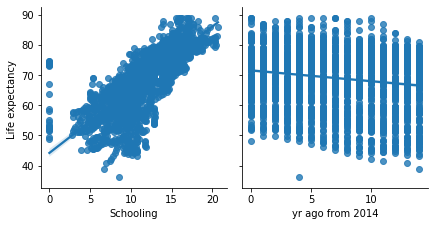

In [41]:
for i in row_groups:
    pp = sns.pairplot(data=df4, y_vars=['Life expectancy '],x_vars=i, kind="reg", height=3)

In [ ]:
#something wrong with 'infant deaths', because the number is per 1,000. Graph shows values over 1,000.
#something wrong with 'Measles', because the number is per 1,000. Graph shows values over 1,000.

In [42]:
df4['infant deaths']=df4['infant deaths'].map(lambda x: x if x < 1000 else 1000)

In [43]:
df4['Measles ']=df4['Measles '].map(lambda x: x if x < 1000 else 1000)

In [45]:
status_dummy = pd.get_dummies(df4['Status'],prefix = 'status', drop_first=True)
df5 = pd.concat([df4, status_dummy], axis = 1)

In [47]:
country_dummy = pd.get_dummies(df5['Country'],prefix = 'c', drop_first=True)
df5 = pd.concat([df5, country_dummy], axis = 1)

In [50]:
df5.drop(columns=['Country', 'Status'], inplace=True)

In [51]:
df5.to_csv('Life expectancy Data3.csv')